# Check Distances

In [1]:
import pylab as plt

params = {
    'boxplot.boxprops.linewidth': 10.0,
    "figure.figsize": [8, 5],
    "axes.labelsize": 15,
    "axes.labelweight": "medium",
    "axes.titleweight": "medium",
    'legend.fontsize': 15,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "font.weight": "medium",
    # "text.usetex": True,
    "lines.linewidth": 1,
    "axes.titlesize": 15,
    # "font.family": "serif",
    "ytick.minor.visible": True,
    "xtick.minor.visible": True,
    "ytick.right": True,
    "xtick.top": True,
    "ytick.direction": "in",
    "xtick.direction": "in",
    "ytick.major.size": 5,
    "ytick.major.width": 1,
    "ytick.minor.size": 3,
    "ytick.minor.width": 0.6,
    "xtick.major.size": 5,
    "xtick.major.width": 1,
    "xtick.minor.size": 3,
    "xtick.minor.width": 0.6,
}

plt.rcParams.update(params)

In [8]:
from astroNN.apogee import allstar, apogee_astronn
from astroNN.datasets import xmatch
from astropy.io import fits

astronn_VAC_f = fits.getdata(apogee_astronn(dr=17))

good_idx = ((np.abs(astronn_VAC_f['dist_model_error']/astronn_VAC_f['dist'])<0.5) & (astronn_VAC_f['dist']<2e10) & (astronn_VAC_f['fakemag']<500) & (astronn_VAC_f['LOGG_ERR']<0.2))
astronn_VAC_f = astronn_VAC_f[good_idx]

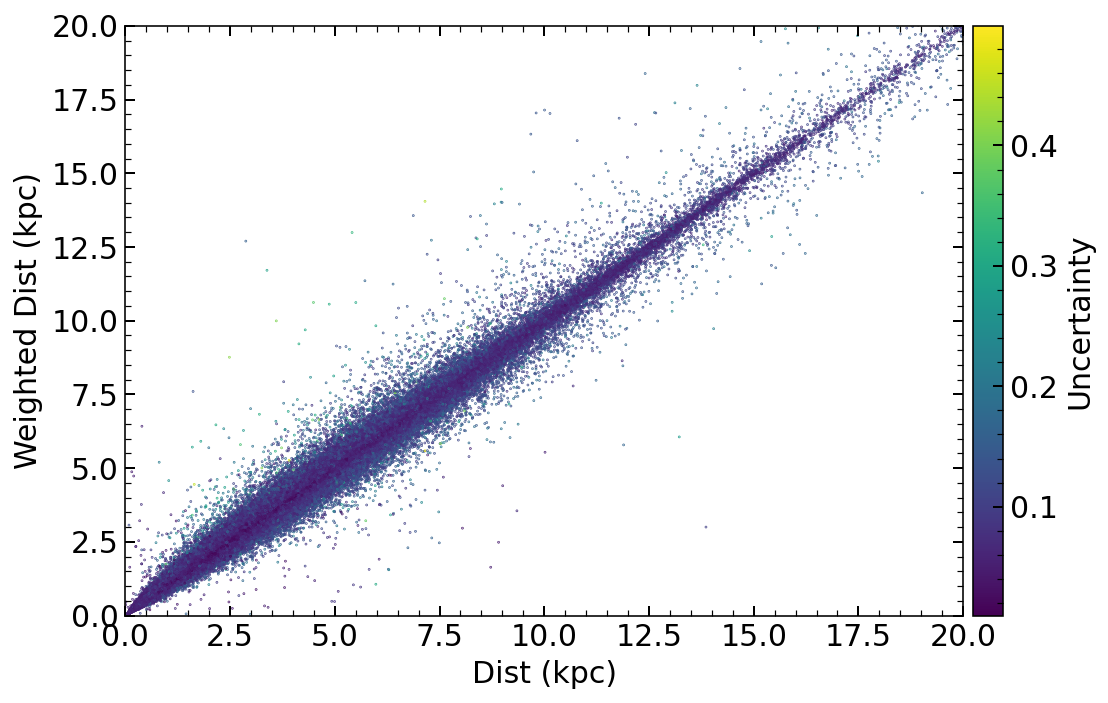

In [9]:
plt.scatter(astronn_VAC_f['dist']/1000, astronn_VAC_f['weighted_dist']/1000, s=0.1, 
            c=astronn_VAC_f['dist_model_error']/astronn_VAC_f['dist'])
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel("Dist (kpc)")
plt.ylabel("Weighted Dist (kpc)")
cbar = plt.colorbar(pad=0.01)
cbar.set_label("Uncertainty")
plt.tight_layout()

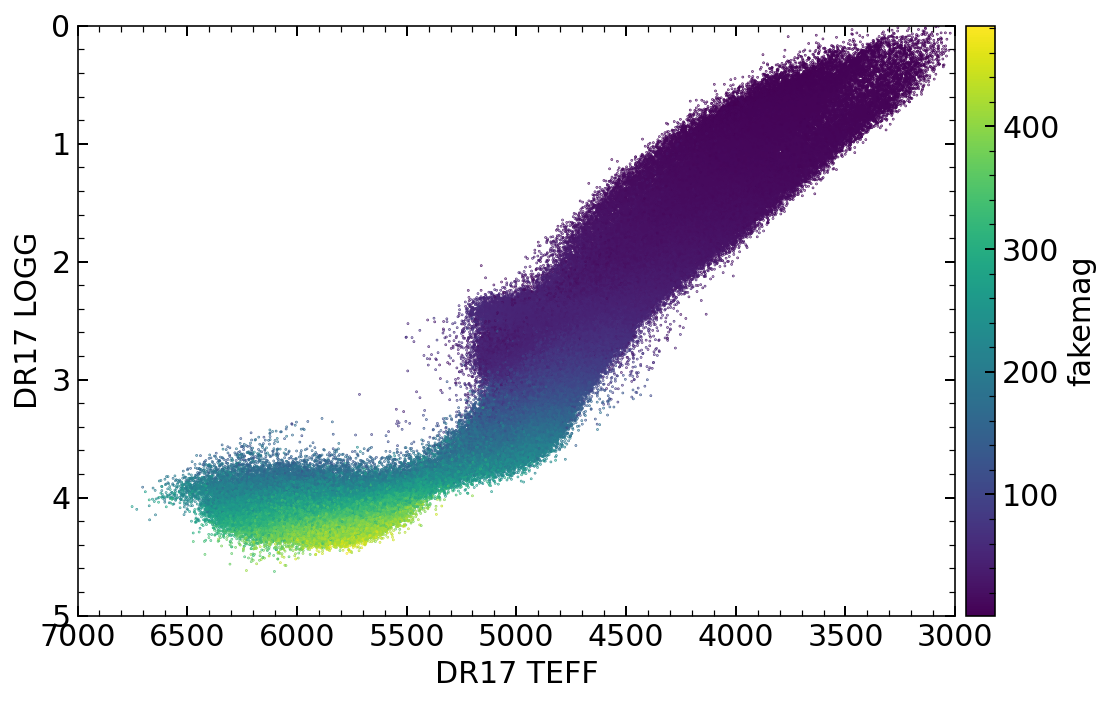

In [11]:
plt.figure()
plt.scatter(astronn_VAC_f["TEFF"], astronn_VAC_f["LOGG"], s=0.1, c=astronn_VAC_f["fakemag"])
plt.xlabel("DR17 TEFF")
plt.ylabel("DR17 LOGG")
plt.xlim(7000, 3000)
plt.ylim(5, 0)
cbar = plt.colorbar(pad=0.01)
cbar.set_label("fakemag")
plt.tight_layout()